## Handling Imbalanced Dataset

1. Up Sampling
2. Down Sampling

In [17]:
from sklearn.datasets import make_classification

In [19]:
X,y=make_classification(n_samples=1000,n_redundant=0,n_features=2,n_clusters_per_class=1,
                   weights=[0.90] ##ratio of class
                   ,random_state=12)

In [20]:
import pandas as pd
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
final_df=pd.concat([df1,df2],axis=1)
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [25]:
final_df.tail()

,f1,f2,target
995,-0.712495,-0.880452,0
996,-2.625830,-2.827891,0
997,-1.326439,-1.815178,0
998,-0.833486,-0.514647,0
999,-0.302876,-0.575975,0


In [26]:
final_df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [23]:
import seaborn as sns

<Axes: xlabel='f1', ylabel='f2'>

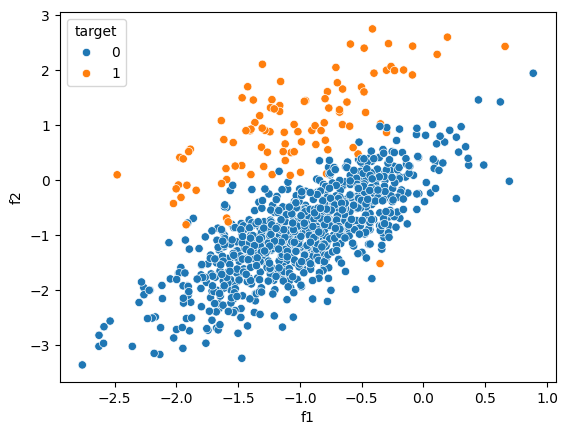

In [27]:
sns.scatterplot(data=final_df,x='f1',y='f2', hue= 'target')

## Getting the class 

In [28]:
df_majority = final_df[final_df['target'] == 0]
df_minority = final_df[final_df['target'] == 1]

## Downsampling

In [29]:
from sklearn.utils import resample

In [30]:
df_majority_downsampled = resample(df_majority,replace=False, #as we need to reduce row, so can't replace
         n_samples=len(df_minority),
         random_state=42
        )

In [31]:
df_majority_downsampled.shape

(100, 3)

In [32]:
df_adjusted_down = pd.concat([df_majority_downsampled, df_minority])

In [33]:
df_adjusted_down

,f1,f2,target
76,-0.965294,-1.401331,0
919,-1.192874,-1.756159,0
255,0.135212,0.797030,0
646,-1.042068,-1.182157,0
44,-0.840928,-0.006882,0
...,...,...,...
960,-0.350689,-1.521741,1
961,-1.920793,-0.814931,1
980,-1.045956,0.514174,1
984,-1.078046,0.083195,1


<Axes: xlabel='f1', ylabel='f2'>

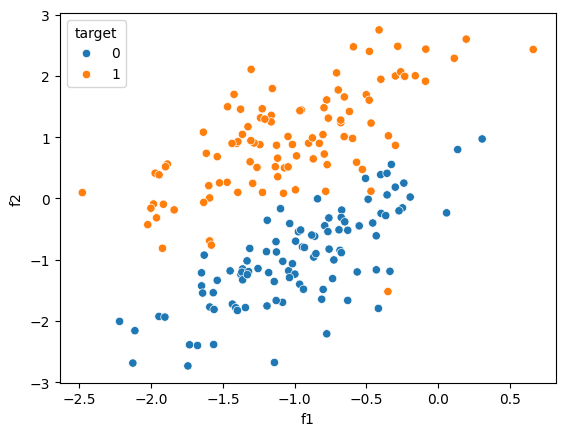

In [35]:
sns.scatterplot(data=df_adjusted_down,x='f1',y='f2', hue= 'target')

## Upscalling: Basic using Resample

In [36]:
df_minority_up_b = resample(df_minority, replace= True,n_samples=len(df_majority),random_state= 42)

In [37]:
df_minority_up_b.shape

(900, 3)

In [38]:
df_upscaling_b = pd.concat([df_minority_up_b, df_majority])

In [39]:
df_upscaling_b['target'].value_counts()

target
1    900
0    900
Name: count, dtype: int64

<Axes: xlabel='f1', ylabel='f2'>

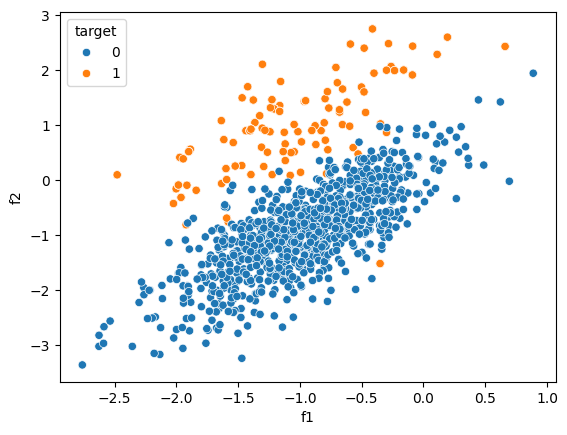

In [ ]:
sns.scatterplot(data=df_upscaling_b,x='f1',y='f2', hue= 'target')
###You cann see lot of points are one above the other
##adding new points at same location

## Upscaling using SMOTE(Synthetic Minority Oversampling Technique)

In [41]:
from imblearn.over_sampling import SMOTE

In [46]:
sm = SMOTE()
X,y = sm.fit_resample(X=final_df[['f1','f2']] , y= final_df['target'])

In [48]:
X['target'] = y

In [50]:
df_smote = pd.DataFrame(X, columns= ['f1','f2','target'])

<Axes: xlabel='f1', ylabel='f2'>

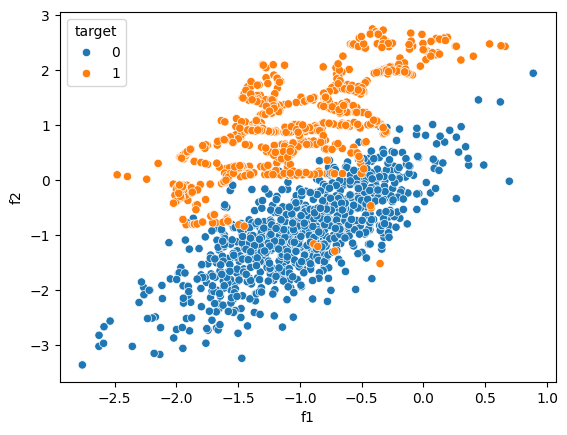

In [51]:
sns.scatterplot(data=df_smote,x='f1',y='f2', hue= 'target')